# Prep set

In [43]:
import pandas as pd
import ast
import json
import subprocess as sb
import numpy as np

In [2]:
data="hy.json"
#data="data_half_month"
#sb.call(["./join_users.sh", data])
with open(data, 'r') as r:
    #res=pd.DataFrame()
    i=0
    lines=[]
    for x in r:
        # json module doesn't work here - not valid JSON provided
        #a=json.loads(x)
        #break
        lines.append(pd.DataFrame([json.loads(x)]))
        i+=1
        if i%10000==0:
            print(i)
    res=pd.concat(lines)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


In [3]:
res['business_review_count']=res['business'].map(lambda x: x['review_count'])

In [4]:
res['attributes_count']=res['business'].map(lambda x: len(x['attributes']))

In [5]:
row=(dict(res[['attributes_count']].reset_index().iterrows())[0])
for x in row:
    print(x)

0
18


In [6]:
row[1]

18

In [7]:
res.index=pd.RangeIndex(len(res))

In [8]:
res.count()

business                 211047
cool                     211047
date                     211047
funny                    211047
review_id                211047
stars                    211047
text                     211047
useful                   211047
user_id                  211047
business_review_count    211047
attributes_count         211047
dtype: int64

In [9]:
pd.set_option('display.max_rows', 10)
res.groupby('cool').count()

,business,date,funny,review_id,stars,text,useful,user_id,business_review_count,attributes_count
cool,,,,,,,,,,
0,141132,141132,141132,141132,141132,141132,141132,141132,141132,141132
1,41087,41087,41087,41087,41087,41087,41087,41087,41087,41087
2,14141,14141,14141,14141,14141,14141,14141,14141,14141,14141
3,6100,6100,6100,6100,6100,6100,6100,6100,6100,6100
4,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956
...,...,...,...,...,...,...,...,...,...,...
167,1,1,1,1,1,1,1,1,1,1
170,1,1,1,1,1,1,1,1,1,1
172,1,1,1,1,1,1,1,1,1,1


In [10]:
res.groupby('useful').count()

,business,cool,date,funny,review_id,stars,text,user_id,business_review_count,attributes_count
useful,,,,,,,,,,
0,81147,81147,81147,81147,81147,81147,81147,81147,81147,81147
1,51650,51650,51650,51650,51650,51650,51650,51650,51650,51650
2,29142,29142,29142,29142,29142,29142,29142,29142,29142,29142
3,16510,16510,16510,16510,16510,16510,16510,16510,16510,16510
4,9946,9946,9946,9946,9946,9946,9946,9946,9946,9946
...,...,...,...,...,...,...,...,...,...,...
168,1,1,1,1,1,1,1,1,1,1
170,1,1,1,1,1,1,1,1,1,1
173,1,1,1,1,1,1,1,1,1,1


In [11]:
res.groupby('funny').count()

,business,cool,date,review_id,stars,text,useful,user_id,business_review_count,attributes_count
funny,,,,,,,,,,
0,150293,150293,150293,150293,150293,150293,150293,150293,150293,150293
1,33785,33785,33785,33785,33785,33785,33785,33785,33785,33785
2,11992,11992,11992,11992,11992,11992,11992,11992,11992,11992
3,5559,5559,5559,5559,5559,5559,5559,5559,5559,5559
4,2993,2993,2993,2993,2993,2993,2993,2993,2993,2993
...,...,...,...,...,...,...,...,...,...,...
260,1,1,1,1,1,1,1,1,1,1
414,1,1,1,1,1,1,1,1,1,1
487,1,1,1,1,1,1,1,1,1,1


In [12]:
res['text'].loc[2]

'New restaurant for Vegas.   Food was fresh,a lot of it and delicious.  Staff was friendly and accomendating.   Had one each of the chicken and beef tacos.  Meat was tasty and tender.  For those nonmexican lovers also has falafel, schnitzel, grilled chicken.  Will be back often.'

In [13]:
res[res['text'].isnull()]

,business,cool,date,funny,review_id,stars,text,useful,user_id,business_review_count,attributes_count


In [14]:
# number of words
pd.set_option('display.max_rows', 800)
res.groupby(lambda a: len(res['text'].loc[a].split(' '))).count()

,business,cool,date,funny,review_id,stars,text,useful,user_id,business_review_count,attributes_count
1,14,14,14,14,14,14,14,14,14,14,14
2,35,35,35,35,35,35,35,35,35,35,35
3,31,31,31,31,31,31,31,31,31,31,31
4,71,71,71,71,71,71,71,71,71,71,71
5,110,110,110,110,110,110,110,110,110,110,110
6,198,198,198,198,198,198,198,198,198,198,198
7,285,285,285,285,285,285,285,285,285,285,285
8,334,334,334,334,334,334,334,334,334,334,334
9,465,465,465,465,465,465,465,465,465,465,465
10,509,509,509,509,509,509,509,509,509,509,509


In [15]:
# review_counts
#res.groupby('business_review_count').count()
res[res['business_review_count']>50].count()

business                 140109
cool                     140109
date                     140109
funny                    140109
review_id                140109
stars                    140109
text                     140109
useful                   140109
user_id                  140109
business_review_count    140109
attributes_count         140109
dtype: int64

In [16]:
res.groupby('attributes_count').count()
res[res['attributes_count']>10].count()

business                 135074
cool                     135074
date                     135074
funny                    135074
review_id                135074
stars                    135074
text                     135074
useful                   135074
user_id                  135074
business_review_count    135074
attributes_count         135074
dtype: int64

In [17]:
pd.set_option('display.max_rows', 0)

In [18]:
res['business'].loc[2]['stars']

5.0

In [19]:
n=res[res['business_review_count']>50].count()[0]
print(n)
#print(type(n))
#rs=res[res['business_review_count']>50].sample(n=n).copy()
#pos=rs[rs[like_type]>2].sample(n=40000).copy()

140109


In [20]:
#res[lambda r: True].sample(n=1) #??
#res[print(res['business'])]#
#res[print(type(res['business']))]
#res.apply()
#res[res['business'].get('business_id')=='aAbL_y05zPWaIrT1QtDWxw'].sample(n=1)

In [21]:
def get_reviews(like_type):
    n=res[res['business_review_count']>50].count()[0]
    #print(n)
    #print(type(n))
    tmp=res[res['business_review_count']>50].sample(n=n).copy()
    n=tmp[tmp['attributes_count']>10].count()[0]
    rs=tmp[tmp['attributes_count']>10].sample(n=n).copy()

    pos=rs[rs[like_type]>2].sample(n=10000).copy()
    pos['classification']=like_type
    neg=rs[rs[like_type]==0].sample(n=10000).copy()
    neg['classification']='not-'+like_type
    all=pd.concat([pos, neg])
    all=all[['text', like_type, 'classification', 'stars', 'business']].reset_index(drop=True)
    return all

# Classification

In [22]:
import nltk
toker=nltk.tokenize.TweetTokenizer()

In [23]:
like_type='useful'
#like_type='funny'
#like_type='cool'

In [24]:
reviews=get_reviews(like_type)

In [25]:
texts_tokenized = (toker.tokenize(row.text) for index, row in reviews.iterrows())
all_words = nltk.FreqDist(w.lower() for tokens in texts_tokenized for w in tokens)

print('total number of words:', sum(all_words.values()))
print('unique words:', len(all_words))
print('words present only once:', sum(c for c in all_words.values() if c == 1))

all_words.plot(30)

total number of words: 3532837
unique words: 53193
words present only once: 26296


<Figure size 640x480 with 1 Axes>

feature words: 26480


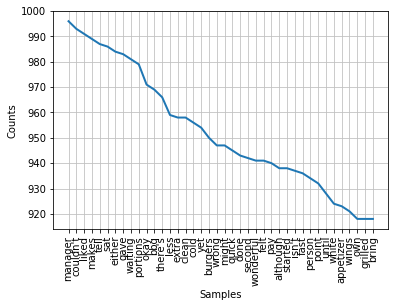

In [26]:
words = all_words.copy()
for w, count in all_words.items():
    if count > 1000 or count == 1:
        del words[w]

print('feature words:', len(words))
words.plot(40)

In [27]:
word_features = frozenset(words.keys())

def features(row):
    text=row.text
    txt_words = set(toker.tokenize(text.lower()))
    features = {}
    for w in txt_words & word_features:
        #features['contains({})'.format(w)] = 'Yes' # beze slov je to lepsi
        pass
    
    text=toker.tokenize(text.lower())
    for w,w2 in zip(text[:-1], text[1:]):
        if w in word_features and w2 in word_features:
                features['contains({}&&&{})'.format(w,w2)] = 'Yes'
                pass
            
    #features['contains(@@stars{})'.format(row.stars)] = 'Yes'
    features['@@@stars'] = row.stars
    features['@@@bus_stars']=row['business']['stars']
    #features['@@@review_count']= "A lot" if row['business']['review_count']  else "A few"
    l=len(row['text'].split(' '))
    features['@@@review_length']= "short" if l<50 else "middle" if l<150 else "long"
    
    return features

In [28]:
# generate tuples: (features_dict, sentiment)
feature_sets = [(features(row), row.classification) for index, row in reviews.iterrows()]

In [29]:
feature_sets[0]

({'@@@stars': 5, '@@@bus_stars': 3.5, '@@@review_length': 'short'}, 'useful')

# Model training

In [30]:
    import random
    random.shuffle(feature_sets)
    half=int(len(feature_sets)/2)
    train_set, test_set = feature_sets[:half], feature_sets[half:]
    half

10000

In [31]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [32]:
print(nltk.classify.accuracy(classifier, test_set))

0.6504


In [33]:
classifier.show_most_informative_features(30)

Most Informative Features
contains(liquor&&&license) = 'Yes'          useful : not-us =     10.8 : 1.0
contains(close&&&together) = 'Yes'          useful : not-us =      9.5 : 1.0
 contains(main&&&reason) = 'Yes'          useful : not-us =      8.9 : 1.0
contains(spring&&&break) = 'Yes'          useful : not-us =      8.9 : 1.0
contains(italian&&&sausage) = 'Yes'          useful : not-us =      8.2 : 1.0
contains(cash&&&register) = 'Yes'          useful : not-us =      8.2 : 1.0
contains(local&&&business) = 'Yes'          useful : not-us =      8.2 : 1.0
    contains(days&&&ago) = 'Yes'          useful : not-us =      7.6 : 1.0
contains(caramelized&&&onions) = 'Yes'          useful : not-us =      6.9 : 1.0
contains(within&&&walking) = 'Yes'          useful : not-us =      6.9 : 1.0
  contains(cell&&&phone) = 'Yes'          useful : not-us =      6.9 : 1.0
contains(crispy&&&crust) = 'Yes'          useful : not-us =      6.9 : 1.0
contains(fellow&&&yelpers) = 'Yes'          useful : not

In [34]:
# information gain
X, Y = [x[0] for x in test_set], [x[1] for x in test_set]

In [35]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
X[0]

{'contains(dont&&&understand)': 'Yes',
 'contains(needs&&&attention)': 'Yes',
 '@@@stars': 1,
 '@@@bus_stars': 3.5,
 '@@@review_length': 'middle'}

In [37]:
cv_gain = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000)

In [38]:
all_keys=[set(x.keys()) for x in X]

In [80]:
import functools
all_fs=functools.reduce(lambda a,b: a.union(b), all_keys)
all_fs=list(all_fs)

In [81]:
len(all_fs)

66596

In [82]:
def get_int(val):
    if isinstance(val, int):
        return val
    if isinstance(val, float):
        return val
    vals={"Yes":1, "No":0, "middle":1, "long":2, "short":0}
    return vals[val]

In [83]:
#X_matrix=[]
#
#for x in X:
#    row=[]
#    for key in all_fs:
#        if key in x:
#            row.append(get_int(x[key]))
#        else:
#            row.append(0)
#    X_matrix.append(row)

In [86]:
import scipy

In [102]:
row=[]
for key in all_fs:
    if key in x:
        row.append(get_int(x[key]))
    else:
        row.append(0)
X_matrix=scipy.sparse.lil_matrix([row])

i=0
for x in X[1:]:
    row=[]
    for key in all_fs:
        if key in x:
            row.append(get_int(x[key]))
        else:
            row.append(0)
    X_matrix=scipy.sparse.vstack((X_matrix, scipy.sparse.lil_matrix([row])))
    i+=1
    #if i==1000:
        #break

In [103]:
len(X)

10000

In [104]:
X_matrix

<10000x66596 sparse matrix of type '<class 'numpy.float64'>'
	with 118212 stored elements in COOrdinate format>

In [126]:
res_gain = list(zip(all_fs, mutual_info_classif(X_matrix, Y, discrete_features=True)))

In [136]:
#res_gain

In [130]:
[(x,y) for (x,y) in res_gain if y>0.001]

[('@@@stars', 0.012607626304040331),
 ('@@@review_length', 0.09343410058570402),
 ('@@@bus_stars', 0.0016169785055902394)]

In [126]:
#X_vec=cv_gain.fit_transform(X)

In [135]:
#res_gain = zip(cv_gain.get_feature_names(), mutual_info_classif(X_matrix, Y[:11], discrete_features=True))

In [131]:
#cv_gain.get_feature_names()

In [132]:
#res_lim=[(x,y) for (x,y) in list(res_gain)]

In [133]:
#res_lim

In [134]:
#dict(res_gain)

In [50]:
categories = ['talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)

In [51]:
X, Y = newsgroups_train.data, newsgroups_train.target

In [53]:
X[0]

"From: nicho@vnet.IBM.COM (Greg Stewart-Nicholls)\nSubject: Re: Biosphere II\nReply-To: nicho@vnet.ibm.com\nDisclaimer: This posting represents the poster's views, not those of IBM\nNews-Software: UReply 3.1\nX-X-From: nicho@vnet.ibm.com\n            <1q1kia$gg8@access.digex.net>\nLines: 18\n\nIn <1q1kia$gg8@access.digex.net> Pat writes:\n>In article <19930408.043740.516@almaden.ibm.com> nicho@vnet.ibm.com writes:\n>>In <1q09ud$ji0@access.digex.net> Pat writes:\n>>>Why is everyone being so critical of B2?\n>> Because it's bogus science, promoted as 'real' science.\n>It seems to me, that it's sorta a large engineering project more\n>then a science project.\n  Bingo.\n>B2 is not bench science,  but rather a large scale attempt to\n>re-create a series of micro-ecologies.   what's so eveil about this?\n Nothing evil at all. There's no actual harm in what they're doing, only\nhow they represent it.\n\n -----------------------------------------------------------------\n .sig files are like s

In [60]:

cv = CountVectorizer(max_df=0.95, min_df=2,
                                     max_features=10000,
                                     stop_words='english')
X_vec = cv.fit_transform(X)

res = dict(zip(cv.get_feature_names(),
               mutual_info_classif(X_vec, Y, discrete_features=True)
               ))


In [ ]:
#printn(res)

In [116]:
for x in X_vec[0]:
        print(x)

  (0, 6987)	1
  (0, 9240)	1
  (0, 2122)	1
  (0, 2783)	1
  (0, 6296)	1
  (0, 6350)	1
  (0, 1747)	1
  (0, 6303)	1
  (0, 4108)	1
  (0, 9953)	2
  (0, 3430)	1
  (0, 8559)	1
  (0, 5327)	1
  (0, 1130)	1
  (0, 3681)	1
  (0, 8143)	1
  (0, 7484)	1
  (0, 4465)	1
  (0, 6308)	1
  (0, 3041)	1
  (0, 8930)	2
  (0, 4264)	1
  (0, 776)	1
  (0, 6119)	1
  (0, 8922)	1
  :	:
  (0, 720)	3
  (0, 9361)	1
  (0, 8270)	1
  (0, 6081)	1
  (0, 6264)	3
  (0, 8950)	1
  (0, 6150)	2
  (0, 9558)	1
  (0, 6859)	1
  (0, 8902)	1
  (0, 7489)	1
  (0, 6861)	1
  (0, 8945)	2
  (0, 2953)	1
  (0, 9012)	3
  (0, 7476)	1
  (0, 4558)	1
  (0, 7289)	3
  (0, 6101)	2
  (0, 8510)	1
  (0, 4161)	2
  (0, 2174)	6
  (0, 4523)	7
  (0, 9595)	5
  (0, 6100)	6


In [23]:
# import pickle

#with open('sentiment_classifier.pickle', 'wb') as f:
 #   pickle.dump(classifier, f)

In [24]:
#train('useful')

In [ ]:
classifier = nltk.DecisionTreeClassifier.train(train_set)

In [26]:
print(nltk.classify.accuracy(classifier, test_set))

0.532


In [40]:
classifier._decisions.items()

AttributeError: 'NaiveBayesClassifier' object has no attribute '_decisions'

In [27]:
classifier.pseudocode() #tohle nefunguje --- proc???

TypeError: '<' not supported between instances of 'str' and 'NoneType'